In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import tensorflow as tf
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
import glob

In [0]:
#  self.model = load_model('/content/drive/My Drive/mountaincar_success.h5')

In [0]:
climb_train_x = []
climb_y = []
with open('/content/drive/My Drive/climb_train.txt','r') as file:
  line_array = file.readlines()
  feature_vec = []
  count = 0
  for l in line_array:
    l_array = l.split()
    feature_vec.append(float(l_array[0]))
    feature_vec.append(float(l_array[1]))
    feature_vec.append(float(l_array[2]))
    count += 3
    if count % 192 == 0:
      climb_train_x.append(feature_vec)
      feature_vec = []
      climb_y.append([1,0,0])

In [0]:
descend_train_x = []
descend_y = []
with open('/content/drive/My Drive/descend_train.txt','r') as file:
  line_array = file.readlines()
  feature_vec = []
  count = 0
  for l in line_array:
    l_array = l.split()
    feature_vec.append(float(l_array[0]))
    feature_vec.append(float(l_array[1]))
    feature_vec.append(float(l_array[2]))
    count += 3
    if count % 192 == 0:
      descend_train_x.append(feature_vec)
      feature_vec = []
      descend_y.append([0,1,0])

In [0]:
walk_train_x = []
walk_y = []
with open('/content/drive/My Drive/walk_train.txt','r') as file:
  line_array = file.readlines()
  feature_vec = []
  count = 0
  for l in line_array:
    l_array = l.split()
    feature_vec.append(float(l_array[0]))
    feature_vec.append(float(l_array[1]))
    feature_vec.append(float(l_array[2]))
    count += 3
    if count % 192 == 0:
      walk_train_x.append(feature_vec)
      feature_vec = []
      walk_y.append([0,0,1])

In [44]:
print(np.array(descend_train_x).shape)
print(np.array(descend_y).shape)

(163, 192)
(163, 3)


In [10]:
print(np.array(climb_train_x).shape)
print(np.array(climb_y).shape)

(225, 192)
(225,)


In [0]:
X_train = np.concatenate((climb_train_x, descend_train_x, walk_train_x), axis=0)
y_train = np.concatenate((climb_y, descend_y, walk_y))

In [17]:
print(X_train.shape)

(947, 192)


In [0]:
climb_test_x = []
climb_test_y = []
with open('/content/drive/My Drive/climb_test.txt','r') as file:
  line_array = file.readlines()
  feature_vec = []
  count = 0
  for l in line_array:
    l_array = l.split()
    feature_vec.append(float(l_array[0]))
    feature_vec.append(float(l_array[1]))
    feature_vec.append(float(l_array[2]))
    count += 3
    if count % 192 == 0:
      climb_test_x.append(feature_vec)
      feature_vec = []
      climb_test_y.append([1,0,0])

In [0]:
descend_test_x = []
descend_test_y = []
with open('/content/drive/My Drive/descend_test.txt','r') as file:
  line_array = file.readlines()
  feature_vec = []
  count = 0
  for l in line_array:
    l_array = l.split()
    feature_vec.append(float(l_array[0]))
    feature_vec.append(float(l_array[1]))
    feature_vec.append(float(l_array[2]))
    count += 3
    if count % 192 == 0:
      descend_test_x.append(feature_vec)
      feature_vec = []
      descend_test_y.append([0,1,0])

In [0]:
walk_test_x = []
walk_test_y = []
with open('/content/drive/My Drive/walk_train.txt','r') as file:
  line_array = file.readlines()
  feature_vec = []
  count = 0
  for l in line_array:
    l_array = l.split()
    feature_vec.append(float(l_array[0]))
    feature_vec.append(float(l_array[1]))
    feature_vec.append(float(l_array[2]))
    count += 3
    if count % 192 == 0:
      walk_test_x.append(feature_vec)
      feature_vec = []
      walk_test_y.append([0,0,1])

In [0]:
X_test = np.concatenate((climb_test_x, descend_test_x, walk_test_x), axis=0)
y_test = np.concatenate((climb_test_y, descend_test_y, walk_test_y))

In [49]:
print(X_test.shape)
print(y_test.shape)
print(y)

(736, 192)
(736, 3)


In [116]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.01), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=16)

Epoch 1/16
947/947 [==============================] - 1s 636us/step - loss: 0.2003 - acc: 0.5702
Epoch 2/16
947/947 [==============================] - 0s 44us/step - loss: 0.1615 - acc: 0.6526
Epoch 3/16
947/947 [==============================] - 0s 47us/step - loss: 0.1225 - acc: 0.7550
Epoch 4/16
947/947 [==============================] - 0s 43us/step - loss: 0.1046 - acc: 0.7920
Epoch 5/16
947/947 [==============================] - 0s 47us/step - loss: 0.0909 - acc: 0.8226
Epoch 6/16
947/947 [==============================] - 0s 43us/step - loss: 0.0820 - acc: 0.8490
Epoch 7/16
947/947 [==============================] - 0s 43us/step - loss: 0.0740 - acc: 0.8648
Epoch 8/16
947/947 [==============================] - 0s 43us/step - loss: 0.0748 - acc: 0.8606
Epoch 9/16
947/947 [==============================] - 0s 44us/step - loss: 0.0645 - acc: 0.8849
Epoch 10/16
947/947 [==============================] - 0s 48us/step - loss: 0.0664 - acc: 0.8691
Epoch 11/16
947/947 [=================

In [117]:
model.evaluate(X_test,y_test)

736/736 [==============================] - 0s 311us/step


[0.06143086011718918, 0.8804347826086957]

In [63]:
np.argmax(model.predict(X_test)[700])

2

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_preds = model.predict(X_test)
y_pred = []
y_target = []
for i in range(len(test_preds)):
  y_pred.append(np.argmax(test_preds[i])) 
  y_target.append(np.argmax(y_test[i]))
print("Testing Accuracy", accuracy_score(y_target, y_pred))

Testing Accuracy 0.8627717391304348


In [0]:
cm = confusion_matrix(y_target,y_pred)

Normalized confusion matrix
[[0.46534653 0.1980198  0.33663366]
 [0.27631579 0.51315789 0.21052632]
 [0.01431127 0.00357782 0.98211091]]


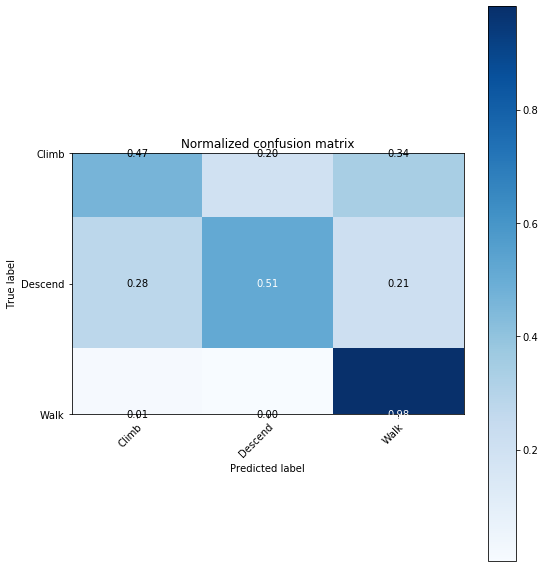

In [113]:
classes = np.array(['Climb','Descend','Walk'])
plot_confusion_matrix(y_target,y_pred,classes=classes)

In [0]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax